### Read the input image

In [5]:
# !pip3 install matplotlib

In [11]:
# import the needed libraries
import tensorflow as tf
import tensorflow.contrib.tensorrt as trt # must import this although we will not use it explicitly
from tensorflow.python.platform import gfile
from PIL import Image
import numpy as np
import time
from matplotlib import pyplot as plt

# read the testing images (only for example)
img1= Image.open("dataset/mnist/testing/0/img_108.jpg")
img2= Image.open("dataset/mnist/testing/1/img_0.jpg")
img1 = np.asarray(img1)
img2 = np.asarray(img2)
input_img = np.concatenate((img1.reshape((1, 28, 28, 1)), 
                            img2.reshape((1, 28, 28, 1))), 
                           axis=0)

### Function to read ".pb" model (TensorRT model is stored in ".pb")

In [7]:
# function to read a ".pb" model 
# (can be used to read frozen model or TensorRT model)
def read_pb_graph(model):
  with gfile.FastGFile(model,'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
  return graph_def

### Perform inference using TensorRT model

In [8]:
# variable
TENSORRT_MODEL_PATH = './model/TensorRT_model.pb'

graph = tf.Graph()
with graph.as_default():
    with tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=1))) as sess:
        # read TensorRT model
        trt_graph = read_pb_graph(TENSORRT_MODEL_PATH)

        # obtain the corresponding input-output tensor
        tf.import_graph_def(trt_graph, name='')
        input = sess.graph.get_tensor_by_name('input_tensor_input:0')
        output = sess.graph.get_tensor_by_name('output_tensor/Softmax:0')

        # in this case, it demonstrates to perform inference for 50 times
        total_time = 0; n_time_inference = 50
        out_pred = sess.run(output, feed_dict={input: input_img})
        for i in range(n_time_inference):
            t1 = time.time()
            out_pred = sess.run(output, feed_dict={input: input_img})
            t2 = time.time()
            delta_time = t2 - t1
            total_time += delta_time
            print("needed time in inference-" + str(i) + ": ", delta_time)
        avg_time_tensorRT = total_time / n_time_inference
        print("average inference time: ", avg_time_tensorRT)

needed time in inference-0:  0.0006282329559326172
needed time in inference-1:  0.0005333423614501953
needed time in inference-2:  0.0004837512969970703
needed time in inference-3:  0.0018155574798583984
needed time in inference-4:  0.0005922317504882812
needed time in inference-5:  0.00046515464782714844
needed time in inference-6:  0.0004563331604003906
needed time in inference-7:  0.0005581378936767578
needed time in inference-8:  0.0005595684051513672
needed time in inference-9:  0.0005283355712890625
needed time in inference-10:  0.0004699230194091797
needed time in inference-11:  0.0005600452423095703
needed time in inference-12:  0.00046515464782714844
needed time in inference-13:  0.0004086494445800781
needed time in inference-14:  0.00036454200744628906
needed time in inference-15:  0.0005152225494384766
needed time in inference-16:  0.00045871734619140625
needed time in inference-17:  0.0005507469177246094
needed time in inference-18:  0.0004184246063232422
needed time in inf

### Perform inference using the original tensorflow model

In [9]:
# variable
FROZEN_MODEL_PATH = './model/frozen_model.pb'

graph = tf.Graph()
with graph.as_default():
    with tf.Session() as sess:
        # read TensorRT model
        frozen_graph = read_pb_graph(FROZEN_MODEL_PATH)

        # obtain the corresponding input-output tensor
        tf.import_graph_def(frozen_graph, name='')
        input = sess.graph.get_tensor_by_name('input_tensor_input:0')
        output = sess.graph.get_tensor_by_name('output_tensor/Softmax:0')

        # in this case, it demonstrates to perform inference for 50 times
        total_time = 0; n_time_inference = 50
        out_pred = sess.run(output, feed_dict={input: input_img})
        for i in range(n_time_inference):
            t1 = time.time()
            out_pred = sess.run(output, feed_dict={input: input_img})
            t2 = time.time()
            delta_time = t2 - t1
            total_time += delta_time
            print("needed time in inference-" + str(i) + ": ", delta_time)
        avg_time_original_model = total_time / n_time_inference
        print("average inference time: ", avg_time_original_model)
        print("TensorRT improvement compared to the original model:", avg_time_original_model/avg_time_tensorRT)

needed time in inference-0:  0.0025250911712646484
needed time in inference-1:  0.0027687549591064453
needed time in inference-2:  0.0022516250610351562
needed time in inference-3:  0.002929210662841797
needed time in inference-4:  0.0027015209197998047
needed time in inference-5:  0.002232074737548828
needed time in inference-6:  0.002107858657836914
needed time in inference-7:  0.0022270679473876953
needed time in inference-8:  0.0028917789459228516
needed time in inference-9:  0.0029876232147216797
needed time in inference-10:  0.0023102760314941406
needed time in inference-11:  0.0022118091583251953
needed time in inference-12:  0.002244234085083008
needed time in inference-13:  0.002538442611694336
needed time in inference-14:  0.0025174617767333984
needed time in inference-15:  0.0027942657470703125
needed time in inference-16:  0.0029790401458740234
needed time in inference-17:  0.002397775650024414
needed time in inference-18:  0.002245664596557617
needed time in inference-19: 

### Plot the prediction result

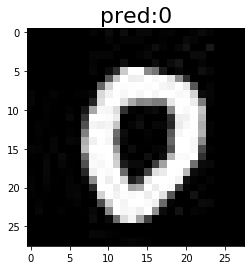

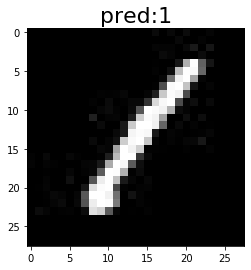

In [12]:
# plot the prediction output
plt.figure('img 1')
plt.imshow(img1, cmap='gray')
plt.title('pred:' + str(np.argmax(out_pred[0])), fontsize=22)

plt.figure('img 2')
plt.imshow(img2, cmap='gray')
plt.title('pred:' + str(np.argmax(out_pred[1])), fontsize=22)
plt.show()